In [23]:
import tarfile
from six.moves import urllib
from scipy import stats
import numpy as np


In [24]:
DOCUMENT_PATH = "/Users/ekalitsi/Cancer-Patient-Anaylysis"

In [25]:
import os
import pandas as pd


# calling data
def load_cancer_patient_data(cancer_patient= DOCUMENT_PATH):
    csv_path = os.path.join(cancer_patient,"cancer.csv")
    return pd.read_csv(csv_path)

df = load_cancer_patient_data()
display(df)


,Case_number,Gender,Age,Year Diagnosed,Tumor Size,Stage,Survival Time
0,10771962,1,55,2004,0.12,1,83
1,12288403,1,57,2004,0.09,1,77
2,12294231,1,88,2004,0.25,2,29
3,12295398,2,70,2004,0.05,1,82
4,12295909,2,54,2004,0.05,1,81
...,...,...,...,...,...,...,...
1430,42776236,1,44,2010,0.08,2,4
1431,42781910,2,32,2010,0.24,1,0
1432,42781968,2,86,2010,0.29,1,0
1433,42782685,2,55,2010,0.18,1,1


In [26]:
frequency_table = df['Stage'].value_counts().reset_index()

In [27]:
frequency_table.columns = ['Tumor Stage', 'Frequency']


In [28]:
print("Frequency Table:")
print(frequency_table)

Frequency Table:
   Tumor Stage  Frequency
0            1        779
1            2        412
2            0        158
3            4         86


In [29]:
frequency_table['Cumulative Frequency'] = frequency_table['Frequency'].cumsum()
print("\nCumulative Frequency Table:")
display(frequency_table)


Cumulative Frequency Table:


,Tumor Stage,Frequency,Cumulative Frequency
0,1,779,779
1,2,412,1191
2,0,158,1349
3,4,86,1435


In [30]:
# Filter the frequency table for stages 2 and below
stages_2_and_below = frequency_table[frequency_table['Tumor Stage'] <= 2]

In [31]:
print("\nCumulative Frequency Table:")
display(frequency_table) 


Cumulative Frequency Table:


,Tumor Stage,Frequency,Cumulative Frequency
0,1,779,779
1,2,412,1191
2,0,158,1349
3,4,86,1435


In [32]:
stages_2_and_below = frequency_table[frequency_table['Tumor Stage'] <= 2]
patients_2_and_below = stages_2_and_below['Frequency'].sum()

print("\nNumber of Patients with Tumor Stages 2 or Less:", patients_2_and_below)


Number of Patients with Tumor Stages 2 or Less: 1349


In [33]:
import matplotlib.pyplot as plt

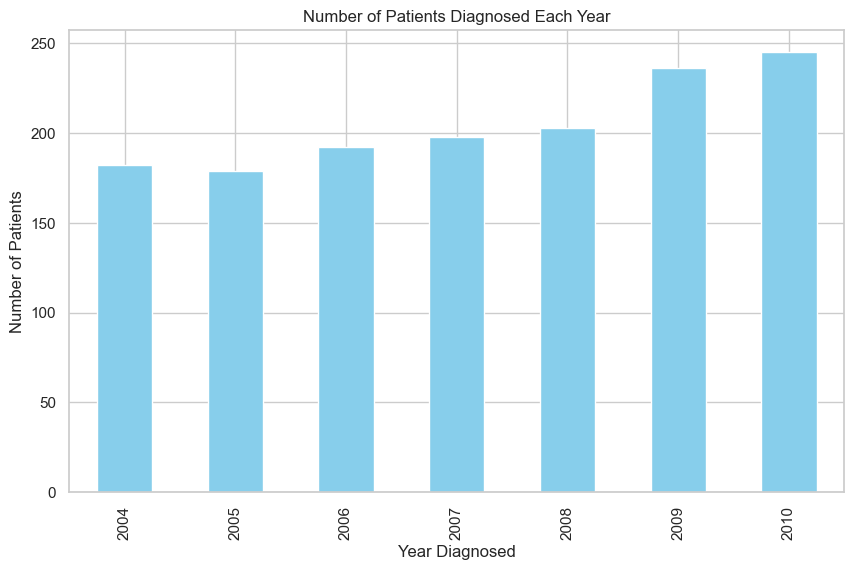

In [34]:
plt.figure(figsize=(10, 6))
df['Year Diagnosed'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of Patients Diagnosed Each Year')
plt.xlabel('Year Diagnosed')
plt.ylabel('Number of Patients')
plt.show()

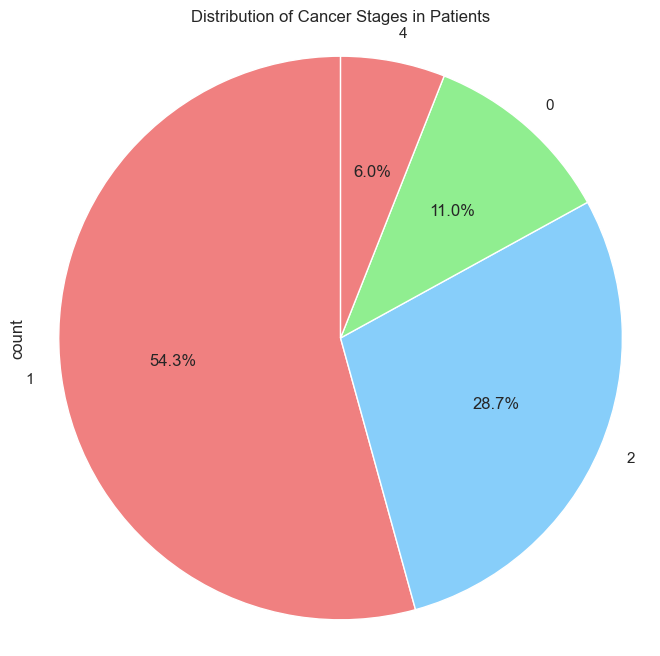

In [35]:


# Create a pie chart of the stages of cancer
plt.figure(figsize=(8, 8))
df['Stage'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue', 'lightgreen'])
plt.title('Distribution of Cancer Stages in Patients')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()

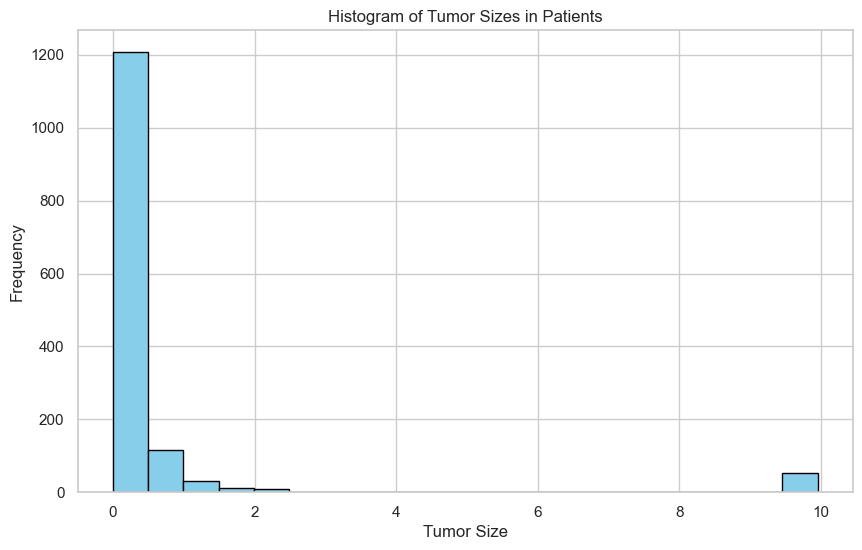

In [36]:
plt.figure(figsize=(10, 6))
plt.hist(df['Tumor Size'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Tumor Sizes in Patients')
plt.xlabel('Tumor Size')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

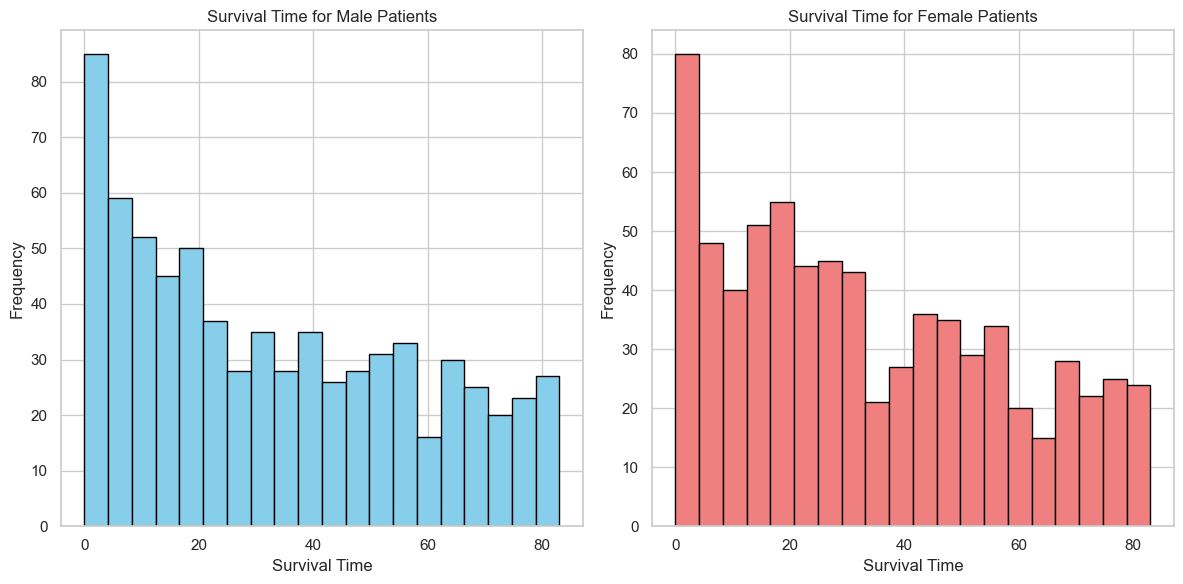

In [37]:


# Create histograms of survival time by gender
plt.figure(figsize=(12, 6))

# Histogram for male patients (Gender == 1)
plt.subplot(1, 2, 1)
plt.hist(df[df['Gender'] == 1]['Survival Time'], bins=20, color='skyblue', edgecolor='black')
plt.title('Survival Time for Male Patients')
plt.xlabel('Survival Time')
plt.ylabel('Frequency')
plt.grid(True)

# Histogram for female patients (Gender == 2)
plt.subplot(1, 2, 2)
plt.hist(df[df['Gender'] == 2]['Survival Time'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Survival Time for Female Patients')
plt.xlabel('Survival Time')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

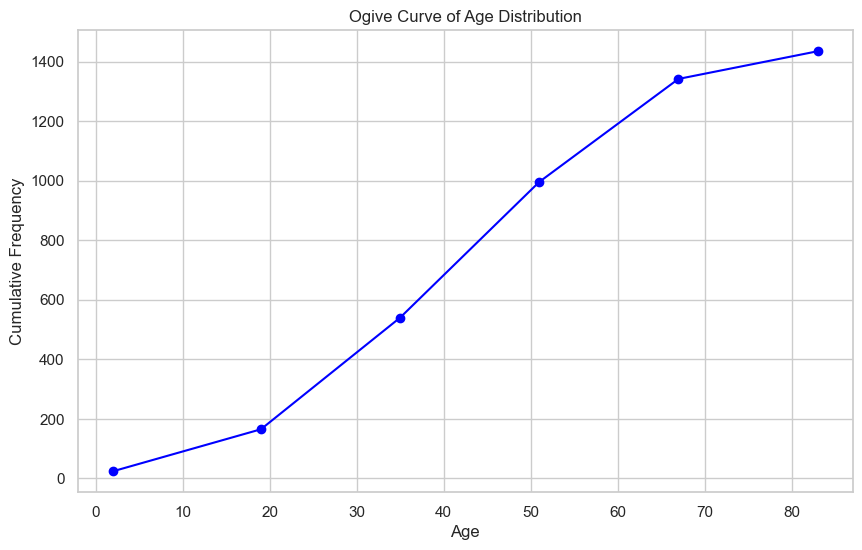


Number of patients diagnosed with cancer less than 50 years: 165


In [38]:


# Set the number of class intervals
num_intervals = 6

# Create class intervals for age
min_age = df['Age'].min()
max_age = df['Age'].max()
interval_width = (max_age - min_age) / num_intervals
class_intervals = [min_age + i * interval_width for i in range(num_intervals + 1)]

# Create a column in the dataframe to represent the age intervals
df['Age Interval'] = pd.cut(df['Age'], bins=class_intervals, include_lowest=True)

# Calculate cumulative frequency
ogive_data = df['Age Interval'].value_counts().sort_index().cumsum()

# Extract left edges of intervals
interval_left_edges = ogive_data.index.categories.left.astype(int)

# Create O-give curve
plt.figure(figsize=(10, 6))
plt.plot(interval_left_edges, ogive_data, marker='o', linestyle='-', color='blue')
plt.title('Ogive Curve of Age Distribution')
plt.xlabel('Age')
plt.ylabel('Cumulative Frequency')
plt.grid(True)
plt.show()

# Estimate the number of patients diagnosed with cancer less than 50 years
patients_less_than_50 = ogive_data[ogive_data.index.categories.right < 50].iloc[-1]
print("\nNumber of patients diagnosed with cancer less than 50 years:", patients_less_than_50)


In [39]:
#HW 2  QUESTION 1 ELIKEM KALITSI DECEMBER 21ST 

print("1. Report the summary plus mean, variance and standard deviation for age, tumor size, and survival time of patients. What can you say about the shape of the distributionof each of the three variables?")

#first desricbe the parameters
summary_stats = df[['Age', 'Tumor Size', 'Survival Time']].describe()

# Then + variance to the summary statistics
variance = df[['Age', 'Tumor Size', 'Survival Time']].var()
summary_stats.loc['variance'] = variance

# printing the summary 
print(summary_stats)

# Interpretation of the shape of the distribution for each variable
print("\n   Interpretation of the Distribution Shapes:")
print("|----!-----!-------!------!----!----!----!-----!------!---|")

# Age
mean_age = summary_stats.loc['mean', 'Age']
median_age = summary_stats.loc['50%', 'Age']

std_age = summary_stats.loc['std', 'Age']

print(f"\nAge: Mean = {mean_age}, Median = {median_age}, Standard Deviation = {std_age}")
#To determine if the distribution is skewed this answers What can you say about the shape of the distribution
#   of each of the three variables?
if mean_age > median_age:
    print("The Age distribution is likely right-skewed..")
elif mean_age < median_age:
    print("The Age distribution is likely left-skewed.")
else:
    print("The Age distribution is likely symmetric.")

# Tumor Size
mean_tumor_size = summary_stats.loc['mean', 'Tumor Size']
median_tumor_size = summary_stats.loc['50%', 'Tumor Size']
std_tumor_size = summary_stats.loc['std', 'Tumor Size']
print(f"\nTumor Size: Mean = {mean_tumor_size}, Median = {median_tumor_size}, Standard Deviation = {std_tumor_size}")

if mean_tumor_size > median_tumor_size:
    print("The Tumor Size distribution is likely right-skewed.")
elif mean_tumor_size < median_tumor_size:
    print("The Tumor Size distribution is likely left-skewed.")
else:
    print("The Tumor Size distribution is likely symmetric.")

# Survival Time
mean_survival_time = summary_stats.loc['mean', 'Survival Time']
median_survival_time = summary_stats.loc['50%', 'Survival Time']
std_survival_time = summary_stats.loc['std', 'Survival Time']


print(f"\nSurvival Time: Mean = {mean_survival_time}, Median = {median_survival_time}, Standard Deviation = {std_survival_time}")

if mean_survival_time > median_survival_time:
    print("The Survival Time distribution is likely right-skewed.")
elif mean_survival_time < median_survival_time:
    print("The Survival Time distribution is likely left-skewed.")
else:
    print("The Survival Time distribution is likely symmetric.")


1. Report the summary plus mean, variance and standard deviation for age, tumor size, and survival time of patients. What can you say about the shape of the distributionof each of the three variables?
                  Age   Tumor Size  Survival Time
count     1435.000000  1435.000000    1435.000000
mean        57.245296     0.626042      33.340070
std         17.447464     1.870627      24.277970
min          3.000000     0.000000       0.000000
25%         46.000000     0.080000      12.000000
50%         58.000000     0.150000      29.000000
75%         70.000000     0.330000      53.000000
max        100.000000     9.950000      83.000000
variance   304.413986     3.499245     589.419837

   Interpretation of the Distribution Shapes:
|----!-----!-------!------!----!----!----!-----!------!---|

Age: Mean = 57.24529616724739, Median = 58.0, Standard Deviation = 17.447463594404013
The Age distribution is likely left-skewed.

Tumor Size: Mean = 0.6260418118466898, Median = 0.15, Standa

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


2. Draw histogram of age of patients by stages and explain the shape of the data.


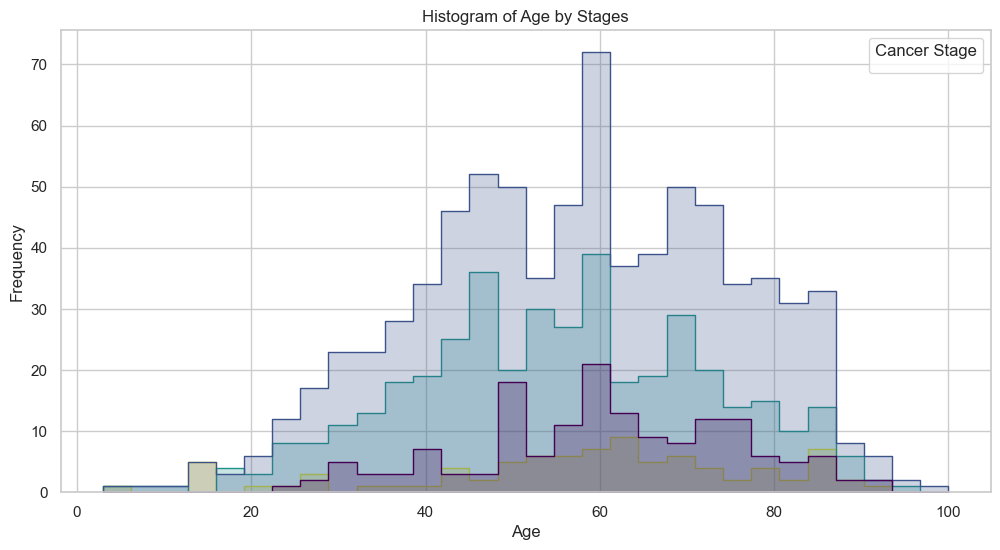

In [40]:
import seaborn as sns

print("2. Draw histogram of age of patients by stages and explain the shape of the data.")
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating a histogram for the age of patients by stages
plt.figure(figsize=(12, 6))
sns.histplot(df, x="Age", hue="Stage", element="step", bins=30, palette="viridis")
plt.title('Histogram of Age by Stages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Cancer Stage')
plt.show()



3. Draw box plots of age, tumor sizes, and survival time of patients separately. Explain the type of data you have.


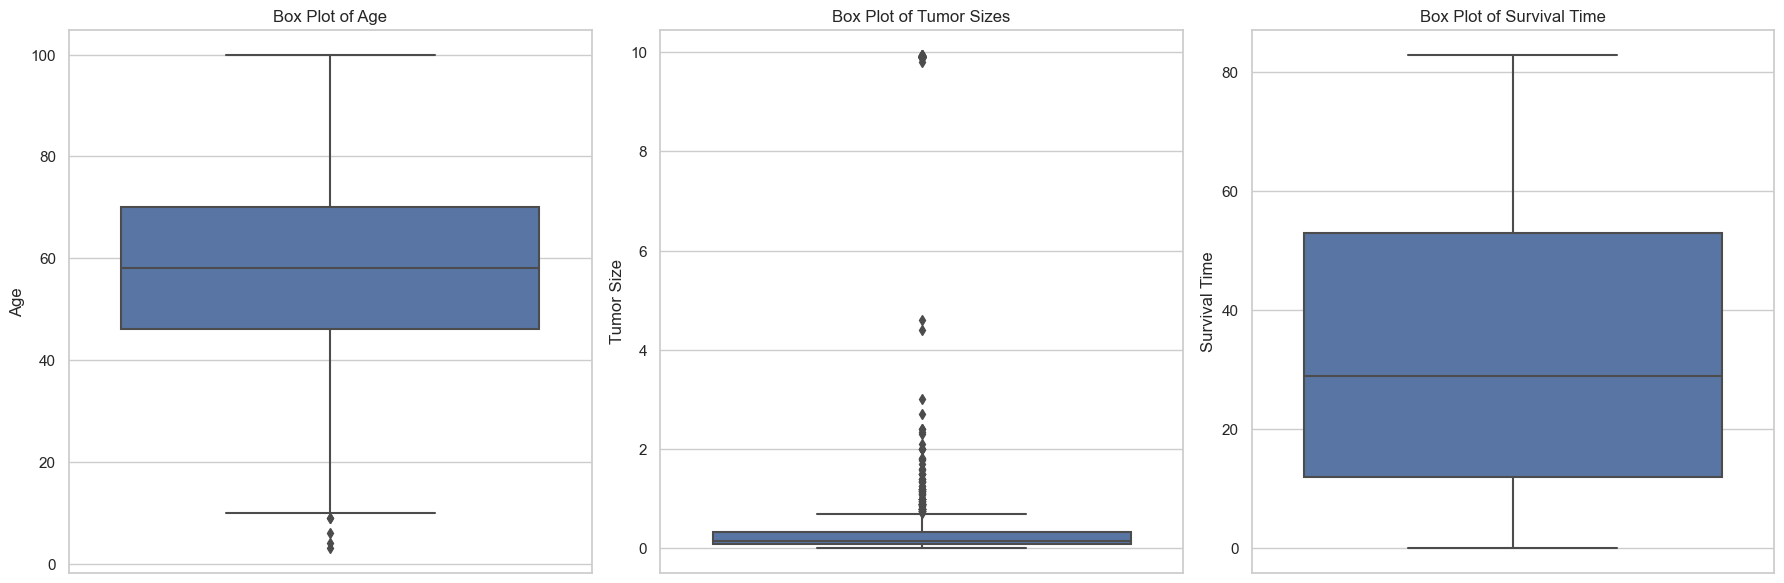


Explanation of the Data Types:
--------------------------------------------------

Continuous numerical data. The box plot will show the distribution, median, and possible outliers

The box plot will show the distribution, median, and possible outliers.

Survival Time: Continuous numerical data. The box plot will show the distribution, median, and possible outliers


In [41]:
print("3. Draw box plots of age, tumor sizes, and survival time of patients separately. Explain the type of data you have.")

# Creating box plots for Age, Tumor Sizes, and Survival Time
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Box plot for Age
sns.boxplot(ax=axes[0], data=df, y="Age")
axes[0].set_title('Box Plot of Age')

# Box plot for Tumor Sizes
sns.boxplot(ax=axes[1], data=df, y="Tumor Size")
axes[1].set_title('Box Plot of Tumor Sizes')

# Box plot for Survival Time
sns.boxplot(ax=axes[2], data=df, y="Survival Time")
axes[2].set_title('Box Plot of Survival Time')

plt.tight_layout()
plt.show()

# Explanation of the type of data
print("\nExplanation of the Data Types:")
print("--------------------------------------------------")
print("\nContinuous numerical data. The box plot will show the distribution, median, and possible outliers")
print("\nThe box plot will show the distribution, median, and possible outliers.")
print("\nSurvival Time: Continuous numerical data. The box plot will show the distribution, median, and possible outliers")


4. Draw box plots of tumor sizes of patients by stages. Explain.


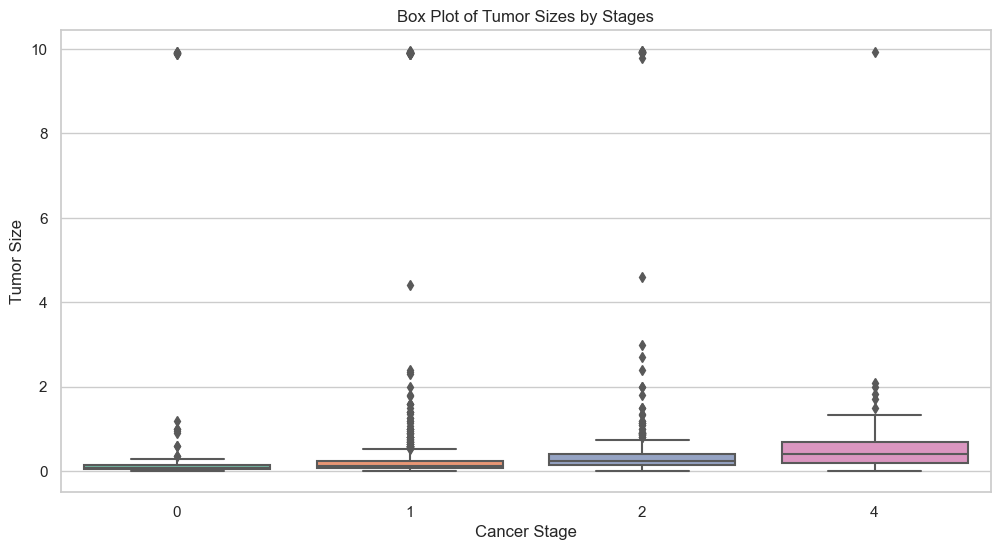

In [42]:
print("4. Draw box plots of tumor sizes of patients by stages. Explain.")

# Box Plot of Tumor Sizes by Stages
plt.figure(figsize=(12, 6))
sns.boxplot(x="Stage", y="Tumor Size", data=df, palette="Set2")
plt.title('Box Plot of Tumor Sizes by Stages')
plt.xlabel('Cancer Stage')
plt.ylabel('Tumor Size')
plt.show()



In [43]:
print ("5. Determine if age of patients or tumor sizes has small variance and relatively easy to work with.")

# Now we Calculating the variance for Age and Tumor Size
variance_age = df['Age'].var()
variance_tumor_size = df['Tumor Size'].var()

# and get the Displaying the variances
print(f"\nVariance of Age: {variance_age}")
print(f"Variance of Tumor Size: {variance_tumor_size}")

# last, we Determining which is easier to work with based on variance
print("\nComparison of Variances:")
print("--------------------------------------------------")
if variance_age < variance_tumor_size:
    print("Age has a smaller variance and may be relatively easier to work with.")
else:
    print("Tumor Size has a smaller variance and may be relatively easier to work with.")


5. Determine if age of patients or tumor sizes has small variance and relatively easy to work with.

Variance of Age: 304.41398587805344
Variance of Tumor Size: 3.499245270217078

Comparison of Variances:
--------------------------------------------------
Tumor Size has a smaller variance and may be relatively easier to work with.


In [48]:
# Extracting the 'Age' column for analysis
ages = df['Age']

# Calculate mean and standard deviation of the ages
mean_age = np.mean(ages)
std_age = np.std(ages, ddof=1) # Using ddof=1 for sample standard deviation

# Number of observations
n = len(ages)

# Calculate the 95% confidence interval for the mean age
confidence_level = 0.95
degrees_freedom = n - 1
confidence_interval = stats.t.interval(confidence_level, degrees_freedom, mean_age, std_age/np.sqrt(n))

print("95% Confidence Interval for the Mean Age:", confidence_interval)


95% Confidence Interval for the Mean Age: (56.34181073147842, 58.14878160301636)


In [49]:
# Extracting the 'Tumor Size' column for analysis
tumor_sizes = df['Tumor Size']

# Calculate mean and standard deviation of the tumor sizes
mean_tumor_size = np.mean(tumor_sizes)
std_tumor_size = np.std(tumor_sizes, ddof=1) # Using ddof=1 for sample standard deviation

# Number of observations for tumor sizes
n_tumor = len(tumor_sizes)

# Calculate the 99% confidence interval for the mean tumor size
confidence_level_99 = 0.99
confidence_interval_99 = stats.t.interval(confidence_level_99, n_tumor - 1, mean_tumor_size, std_tumor_size/np.sqrt(n_tumor))

print("99% Confidence Interval for the Mean Tumor Size:", confidence_interval_99)


99% Confidence Interval for the Mean Tumor Size: (0.4986748679977378, 0.7534087556956419)


In [46]:
Print("HW 3: ")
# Extracting the 'Survival Time' column for analysis
survival_times = df['Survival Time']

# Calculate mean and standard deviation of the survival times
mean_survival_time = np.mean(survival_times)
std_survival_time = np.std(survival_times, ddof=1) # Using ddof=1 for sample standard deviation

# Number of observations for survival times
n_survival = len(survival_times)

# Calculate the 90% confidence interval for the mean survival time
confidence_level_90 = 0.90
confidence_interval_90 = stats.t.interval(confidence_level_90, n_survival - 1, mean_survival_time, std_survival_time/np.sqrt(n_survival))

print("90% Confidence Interval for the Mean Survival Time:", confidence_interval_90)

90% Confidence Interval for the Mean Survival Time: (32.28521088029465, 34.39492849252765)


In [47]:
# Counting the number of patients with the first stage of tumor
stage_1_patients = df[df['Stage'] == 1].shape[0]

# Total number of patients
total_patients = df.shape[0]

# Proportion of patients with first stage tumor
proportion_stage_1 = stage_1_patients / total_patients

# Calculate the 95% confidence interval for the proportion
# Using the normal approximation for the binomial confidence interval
z_score_95 = stats.norm.ppf(1 - 0.05 / 2)  # z-score for 95% confidence
margin_of_error = z_score_95 * np.sqrt(proportion_stage_1 * (1 - proportion_stage_1) / total_patients)

confidence_interval_proportion = (proportion_stage_1 - margin_of_error, proportion_stage_1 + margin_of_error)

print("95% Confidence Interval for the Proportion of Patients with First Stage Tumor:", confidence_interval_proportion)


95% Confidence Interval for the Proportion of Patients with First Stage Tumor: (0.5170826049463015, 0.5686316807679841)
